# Twitter Sentiment Analysis
###### Calculating Subjectivity and Polarity Score of a Twitter Account

#### Sentiment analysis is one of the most common tasks in Data Science and AI. 
  
#### We use Python, Tweepy and TextBlob to perform sentiment analysis of a selected Twitter account using Twitter API and Natural Language Processing.

## Learnings

- How to perform basic sentiment analysis using **TextBlob** (powerful Natural Language Processing library for Python) 
- Use the **WordCloud** library to visualise the findings
- Working with the **Twitter API** (Familiarizing with APIs is a useful skill, it's a very common method of getting hold of the data from the internet)

## Problem definition

Task is to analyse the Tweets of an individual Twitter account in terms of **Subjectivity** and **Polarity**. 
We will identify individual tweets as **positive, negative and neutral** and calculate the percentage of positive tweets. 
We will use the WordCloud library to display a word cloud of the most positive words from the tweets.

## Get Twitter Application Keys

- Create a **Twitter account**
- Go to **developer.twitter.com**
- Apply for developer access by going to - developer.twitter.com/en/apply-for-access and click **Apply for developer account**. Answer a few questions to get started.
- Confirm your email address by clicking on the link that Twitter will send. After confirming your email address, access to Twitter Developer Account should be granted almost immediately.
- Once your access is granted go to the url - https://developer.twitter.com/en/apps and **Create an app**.
- Provide a unique name to your app
- Go to settings tab and get the 4 values -
- - **API key**
- - **API secret key** 
- - **Access token**
- - **Access token secret**
- We need all four values for Twitter Sentiment Analysis

## Import libraries

In [4]:
# Numpy - performing mathematical functions on multi-dimensional arrays
import numpy as np

# Pandas - Data manipulation and analysis library (working with tabular data)
import pandas as pd

# Matplotlib - Python library for plotting graphs and visualisations
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [5]:
# Regular expression Python module
import re

# Tweepy - Python library for accessing the Twitter API
import tweepy

# TextBlob - NLP library for preprocessing of textual data
from textblob import TextBlob

# WordCloud - Python library for creating image clouds of frequently used words
from wordcloud import WordCloud

### Load the API keys and access tokens

In [6]:
config = pd.read_csv('./keys.csv')
print(type(config))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
config.head()

In [ ]:
print(config['twitterApiKey'])
print(type(config['twitterApiKey']))
print(config['twitterApiKey'][0])
# print(config['twitterApiKey'][1])  # Error - ValueError: 1 is not in range

Set all Twitter API config variables required for authentication with Tweepy.

In [10]:
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

We are making an authentication call with Tweepy so we can call a function to retrieve the latest tweets from the specified account.

In [11]:
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)

In [12]:
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)

In [13]:
twiterApi = tweepy.API(auth, wait_on_rate_limit=True)

In [14]:
twitterAccount = 'elonmusk'

In [15]:
tweets = tweepy.Cursor(twiterApi.user_timeline, 
                        screen_name=twitterAccount, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(50);

In [16]:
print(type(tweets))

<class 'tweepy.cursor.ItemIterator'>


In [17]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])

In [18]:
df.head()

,Tweet
0,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
1,"Frodo was the underdoge,\nAll thought he would..."
2,Just agree to do Clubhouse with @kanyewest
3,"Bought some Dogecoin for lil X, so he can be a..."
4,This is true power haha https://t.co/Fc9uhQSd7O


In [26]:
type(df['Tweet'])

pandas.core.series.Series

In [19]:
df['Tweet'][0]

'Happy New Year of the Ox! https://t.co/9WFKMYu2oj'

In [20]:
tweets_li = []
for i in range(10):
    tweets_li.append(df['Tweet'][i])

In [21]:
tweets_li

['Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 'Just agree to do Clubhouse with @kanyewest',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 'This is true power haha https://t.co/Fc9uhQSd7O',
 'RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission! https://t.co/3pWt…',
 'XPrize team will manage the $100M carbon capture prize https://t.co/fSw5IanL0r',
 'Back to work I go …',
 'Ð is for Ðogecoin! Instructional video.\nhttps://t.co/UEEocOfcTb',
 'The people have spoken … https://t.co/x41oVMzTGo']

Before doing sentiment analysis, we clean up each tweets from unnecessary data first.

We are going to create a cleanTweets function that will:
- remove mentions
- remove hashtags
- remove retweets
- remove urls

In [25]:
# re module
s = 'The motorcycle got mobbed.'
print(s)

s = re.sub('mo[a-zA-Z0-9]*', 'bg', s)
print(s)

The motorcycle got mobbed.
The bg got bg.


In [28]:
s = 'The motorcycle got mobbed.'
s = re.sub('m', 'l', s)
print(s)

The lotorcycle got lobbed.


In [26]:
url1 = 'https://www.amazon.com/ahsbjhba/dasda'
url2 = 'http://www.amazon.com/ahsbjhba/dasda'

t1 = re.sub('https:\/\/[a-zA-Z0-9\.\/]+', 'done', url1)
t2 = re.sub('https?:\/\/[a-zA-Z0-9\.\/]+', 'done', url2)
t3 = re.sub('http:\/\/[a-zA-Z0-9\.\/]+', 'done', url1)
t4 = re.sub('https?:\/\/[a-zA-Z0-9\.\/]+', 'done', url2)

print(t1, t2, t3, t4, sep = '\n')

done
done
https://www.amazon.com/ahsbjhba/dasda
done


In [29]:
def cleanTweets(text):
    
    # remove mentions
    text = re.sub('@[a-zA-Z0-9_]+', '', text)
    
    # remove hashtags
    text = re.sub('#', '', text)
    
    # remove retweets
    text = re.sub('RT : ', '', text)
    
    # remove urls
    text = re.sub('https?:\/\/[a-zA-Z0-9\.\/]+', '', text)
    
    return text

And we apply it for all the Tweets in our Pandas Data Frame.

In [31]:
df['Tweet'] = df['Tweet'].apply(cleanTweets)

In [32]:
df.head(50)

,Tweet
0,Happy New Year of the Ox!
1,"Frodo was the underdoge,\nAll thought he would..."
2,Just agree to do Clubhouse with
3,"Bought some Dogecoin for lil X, so he can be a..."
4,This is true power haha
5,NASA has selected Falcon Heavy to launch the f...
6,XPrize team will manage the $100M carbon captu...
7,Back to work I go …
8,Ð is for Ðogecoin! Instructional video.\n
9,The people have spoken …


We form functions to calculate the subjectivity and polarity of the tweets.

**Polarity** is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
  
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. **Subjectivity** is also a float which lies in the range of [0,1].

In [36]:
def getTweetSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getTweetPolarity(text):
    return TextBlob(text).sentiment.polarity

Apply these functions to the data frame and create two new features in the data frame : **Subjectivity** and **Polarity**

In [37]:
df['Subjectivity'] = df['Tweet'].apply(getTweetSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTweetPolarity)

In [38]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,Happy New Year of the Ox!,0.727273,0.485227
1,"Frodo was the underdoge,\nAll thought he would...",0.400000,0.000000
2,Just agree to do Clubhouse with,0.000000,0.000000
3,"Bought some Dogecoin for lil X, so he can be a...",0.000000,0.000000
4,This is true power haha,0.475000,0.275000
5,NASA has selected Falcon Heavy to launch the f...,0.416667,0.056250
6,XPrize team will manage the $100M carbon captu...,0.000000,0.000000
7,Back to work I go …,0.000000,0.000000
8,Ð is for Ðogecoin! Instructional video.\n,0.000000,0.000000
9,The people have spoken …,0.000000,0.000000


In [40]:
df[df['Tweet'] == ''].index

Int64Index([28, 42, 48], dtype='int64')

In [42]:
# df.drop will accept a list of indices to drop
df = df.drop(df[df['Tweet'] == ''].index)

In [44]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,Happy New Year of the Ox!,0.727273,0.485227
1,"Frodo was the underdoge,\nAll thought he would...",0.400000,0.000000
2,Just agree to do Clubhouse with,0.000000,0.000000
3,"Bought some Dogecoin for lil X, so he can be a...",0.000000,0.000000
4,This is true power haha,0.475000,0.275000
5,NASA has selected Falcon Heavy to launch the f...,0.416667,0.056250
6,XPrize team will manage the $100M carbon captu...,0.000000,0.000000
7,Back to work I go …,0.000000,0.000000
8,Ð is for Ðogecoin! Instructional video.\n,0.000000,0.000000
9,The people have spoken …,0.000000,0.000000


We have a score for the subjectivity and polarity of each tweet.

Add a function and categorize tweets as Negative, Neutral and Positive.

In [46]:
def getTextAnalysis(a):
    if a < 0:
        return 'Negative'
    elif a == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [47]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [48]:
df.head(50)

,Tweet,Subjectivity,Polarity,Score
0,Happy New Year of the Ox!,0.727273,0.485227,Positive
1,"Frodo was the underdoge,\nAll thought he would...",0.400000,0.000000,Neutral
2,Just agree to do Clubhouse with,0.000000,0.000000,Neutral
3,"Bought some Dogecoin for lil X, so he can be a...",0.000000,0.000000,Neutral
4,This is true power haha,0.475000,0.275000,Positive
5,NASA has selected Falcon Heavy to launch the f...,0.416667,0.056250,Positive
6,XPrize team will manage the $100M carbon captu...,0.000000,0.000000,Neutral
7,Back to work I go …,0.000000,0.000000,Neutral
8,Ð is for Ðogecoin! Instructional video.\n,0.000000,0.000000,Neutral
9,The people have spoken …,0.000000,0.000000,Neutral


Calculate percentage of positive, neutral and negative tweets from all the tweets in our data frame

In [53]:
positive_perc = ((df[df['Score'] == 'Positive'].shape[0])/(df.shape[0])) * 100
print("Positive:", positive_perc)

neutral_perc = ((df[df['Score'] == 'Neutral'].shape[0])/(df.shape[0])) * 100
print("Neutral:", neutral_perc)

negative_perc = ((df[df['Score'] == 'Negative'].shape[0])/(df.shape[0])) * 100
print("Negative:", negative_perc)

Positive: 25.53191489361702
Neutral: 70.2127659574468
Negative: 4.25531914893617


In [54]:
# Rounding off using  :  %.nf
positive_perc = ((df[df['Score'] == 'Positive'].shape[0])/(df.shape[0])) * 100
print("Positive: %.2f" % positive_perc)

neutral_perc = ((df[df['Score'] == 'Neutral'].shape[0])/(df.shape[0])) * 100
print("Neutral: %.2f" % neutral_perc)

negative_perc = ((df[df['Score'] == 'Negative'].shape[0])/(df.shape[0])) * 100
print("Negative: %.2f" % negative_perc)

Positive: 25.53
Neutral: 70.21
Negative: 4.26


In [56]:
# Rounding off using  :  round(a, 2)
positive_perc = ((df[df['Score'] == 'Positive'].shape[0])/(df.shape[0])) * 100
print("Positive:", round(positive_perc, 2))

neutral_perc = ((df[df['Score'] == 'Neutral'].shape[0])/(df.shape[0])) * 100
print("Neutral:", round(neutral_perc, 2))

negative_perc = ((df[df['Score'] == 'Negative'].shape[0])/(df.shape[0])) * 100
print("Negative:", round(negative_perc, 2))

Positive: 25.53
Neutral: 70.21
Negative: 4.2553


Calculating the percentage of objective tweets

In [75]:
objective_perc = ((df[df['Subjectivity'] == 0].shape[0])/ (df.shape[0])) * 100
print("Objective tweets percentage: {}%".format(round(objective_perc, 2)) )

Objective tweets percentage: 55.32%


Visualising positive, negative, neutral tweets using Matplotlib

In [63]:
label = df.groupby('Score').count().index.values
print(label)

['Negative' 'Neutral' 'Positive']


In [68]:
values = df.groupby('Score').size().values
print(values)

[ 2 33 12]


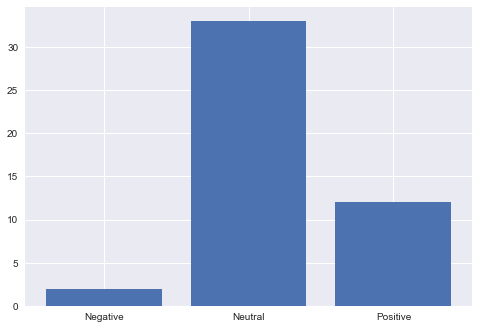

In [83]:
plt.bar(label, values)
plt.show()

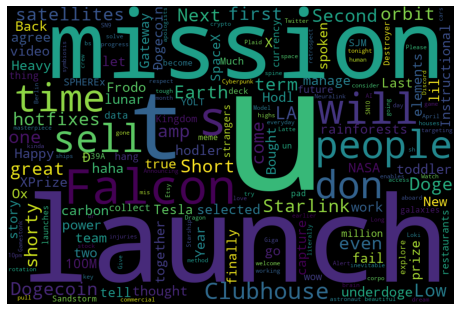

In [85]:
# Wordcloud

words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=900, height=600).generate(words)

plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [81]:
plt.style.use('seaborn')

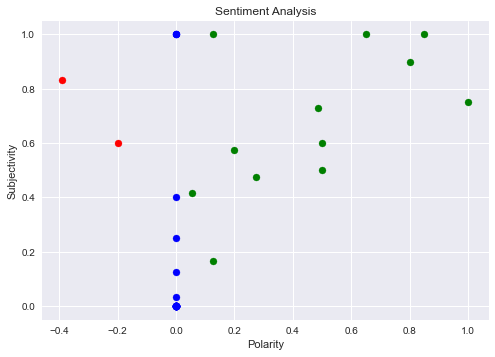

In [87]:
for index, row in df.iterrows():
    if row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color = 'Red')
    elif row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color = 'Green')
    else:
        plt.scatter(row['Polarity'], row['Subjectivity'], color = 'Blue')

plt.title('Sentiment Analysis')
plt.axis('on')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# plt.legend()
plt.show()

In [90]:
import time

In [91]:
start = time.time()

twitterAccount = 'KanganaTeam'
tweets = tweepy.Cursor(twiterApi.user_timeline, 
                        screen_name=twitterAccount, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                      ).items(50);

df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])
df['Tweet'][0]
df['Tweet'] = df['Tweet'].apply(cleanTweets)
df['Subjectivity'] = df['Tweet'].apply(getTweetSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTweetPolarity)
df = df.drop(df[df['Tweet'] == ''].index)
df['Score'] = df['Polarity'].apply(getTextAnalysis)

positive_perc = ((df[df['Score'] == 'Positive'].shape[0])/(df.shape[0])) * 100
print("Positive:", round(positive_perc, 2))
neutral_perc = ((df[df['Score'] == 'Neutral'].shape[0])/(df.shape[0])) * 100
print("Neutral:", round(neutral_perc, 2))
negative_perc = ((df[df['Score'] == 'Negative'].shape[0])/(df.shape[0])) * 100
print("Negative:", round(negative_perc, 2))
objective_perc = ((df[df['Subjectivity'] == 0].shape[0])/ (df.shape[0])) * 100
print("Objective tweets percentage: {}%".format(round(objective_perc, 2)) )

end = time.time()
print('Time taken:', end - start)

Positive: 54.0
Neutral: 34.0
Negative: 12.0
Objective tweets percentage: 32.0%
Time taken: 12.77852201461792


['Negative' 'Neutral' 'Positive']
[ 6 17 27]


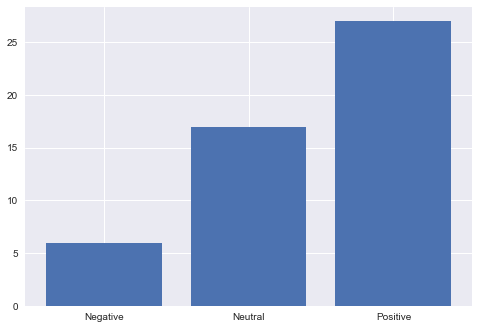

In [92]:
# bar graph
label = df.groupby('Score').count().index.values
print(label)
values = df.groupby('Score').size().values
print(values)
plt.bar(label, values)
plt.show()

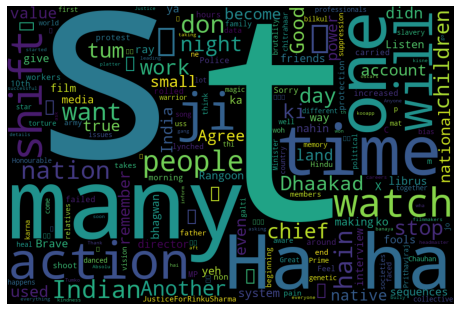

In [93]:
# wordcloud
words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=900, height=600).generate(words)

plt.imshow(wordCloud)
plt.axis('off')
plt.show()

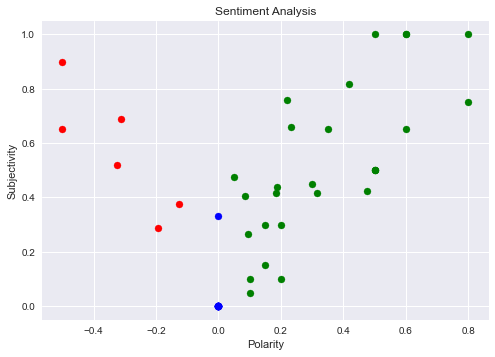

In [94]:
#scatter plot
for index, row in df.iterrows():
    if row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color = 'Red')
    elif row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color = 'Green')
    else:
        plt.scatter(row['Polarity'], row['Subjectivity'], color = 'Blue')

plt.title('Sentiment Analysis')
plt.axis('on')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# plt.legend()
plt.show()

In [95]:
def sentimentAnalysis(twitterAccount):
    start = time.time()

    tweets = tweepy.Cursor(twiterApi.user_timeline, 
                            screen_name=twitterAccount, 
                            count=None,
                            since_id=None,
                            max_id=None,
                            trim_user=True,
                            exclude_replies=True,
                            contributor_details=False,
                            include_entities=False
                          ).items(50);

    df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])
    df['Tweet'][0]
    df['Tweet'] = df['Tweet'].apply(cleanTweets)
    df['Subjectivity'] = df['Tweet'].apply(getTweetSubjectivity)
    df['Polarity'] = df['Tweet'].apply(getTweetPolarity)
    df = df.drop(df[df['Tweet'] == ''].index)
    df['Score'] = df['Polarity'].apply(getTextAnalysis)

    positive_perc = ((df[df['Score'] == 'Positive'].shape[0])/(df.shape[0])) * 100
    print("Positive:", round(positive_perc, 2))
    neutral_perc = ((df[df['Score'] == 'Neutral'].shape[0])/(df.shape[0])) * 100
    print("Neutral:", round(neutral_perc, 2))
    negative_perc = ((df[df['Score'] == 'Negative'].shape[0])/(df.shape[0])) * 100
    print("Negative:", round(negative_perc, 2))
    objective_perc = ((df[df['Subjectivity'] == 0].shape[0])/ (df.shape[0])) * 100
    print("Objective tweets percentage: {}%".format(round(objective_perc, 2)) )

    end = time.time()
    print('Time taken:', end - start)

In [96]:
sentimentAnalysis('imVkohli')

Positive: 56.0
Neutral: 32.0
Negative: 12.0
Objective tweets percentage: 30.0%
Time taken: 7.825835943222046


In [97]:
sentimentAnalysis('gkcs_')

Positive: 60.0
Neutral: 34.0
Negative: 6.0
Objective tweets percentage: 26.0%
Time taken: 8.309110403060913


In [98]:
sentimentAnalysis('rachitiitr')

Positive: 68.0
Neutral: 22.0
Negative: 10.0
Objective tweets percentage: 22.0%
Time taken: 6.931845426559448
